## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### Defining categorical columns

In [4]:
categorical_features = []
for feature in df.columns:
    if df[feature].dtype == 'O':
        categorical_features.append(feature)
print('we have {} categorical features in our dataset: {}'.format(len(categorical_features),categorical_features))

we have 3 categorical features in our dataset: ['sex', 'smoker', 'region']


#### Preparing X and Y variables

In [5]:
X = df.drop("expenses", axis = 1)

In [6]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [8]:
y = df["expenses"]

In [21]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1338, 11)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.43876426,
        -0.4536457 , -0.90861367],
       [ 0.        ,  1.        ,  1.        , ..., -1.50996545,
         0.51418574, -0.07876719],
       [ 0.        ,  1.        ,  1.        , ..., -0.79795355,
         0.38295436,  1.58092576],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.50996545,
         1.02270734, -0.90861367],
       [ 1.        ,  0.        ,  1.        , ..., -1.29636188,
        -0.79812808, -0.90861367],
       [ 1.        ,  0.        ,  0.        , ...,  1.55168573,
        -0.25679863, -0.90861367]])

#### Split Dataset into Train and Test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [14]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

#### Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6135.0165
- Mean Absolute Error: 4097.5840
- R2 Score: 0.7392
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5783.0557
- Mean Absolute Error: 4035.7447
- R2 Score: 0.7846


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.2476
- Mean Absolute Error: 4208.0337
- R2 Score: 0.7418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5797.2951
- Mean Absolute Error: 4182.3918
- R2 Score: 0.7835


Ridge
Model performance for Training set
- Root Mean Squared Error: 6105.3089
- Mean Absolute Error: 4212.3760
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5798.5673
- Mean Absolute Error: 4187.2631
- R2 Score: 0.7834


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4770.4644
- Mean Absolute Error: 2857.6957


In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.866221
5,Random Forest Regressor,0.855281
8,AdaBoost Regressor,0.850574
6,XGBRegressor,0.837316
0,Linear Regression,0.784580
1,Lasso,0.783518
2,Ridge,0.783422
3,K-Neighbors Regressor,0.768453
4,Decision Tree,0.707987


In [18]:
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.07


## Plot y_pred and y_test

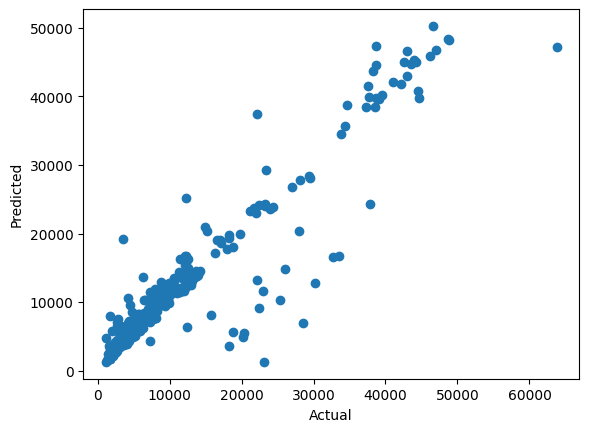

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

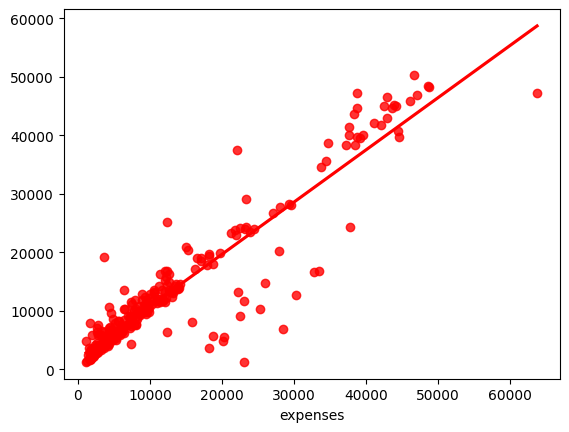

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.07,9972.4321,-877.3621
887,5272.18,5446.1255,-173.9455
890,29330.98,28362.3981,968.5819
1293,9301.89,12345.7259,-3043.8359
259,33750.29,34524.1601,-773.8701
...,...,...,...
109,47055.53,46841.3246,214.2054
575,12222.90,12262.1160,-39.2160
535,6067.13,6408.8773,-341.7473
543,63770.43,47230.3774,16540.0526
